In [410]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [411]:
#age. The age of the patient.
#sex. The gender of the patient. (1 = male, 0 = female).
#cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
#trestbps. Resting blood pressure in mmHg.
#chol. Serum Cholestero in mg/dl.
#fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
#restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
#thalach. Max heart rate achieved.
#exang. Exercise induced angina (1 = yes, 0 = no).
#oldpeak. ST depression induced by exercise relative to rest.
#slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
#ca. Number of major vessels (0–3) colored by flourosopy.
#thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
#num. Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope",
               "ca", "thal", "num"]

test_set = pd.read_csv("processed.cleveland.test.data", delimiter=",")
train_set = pd.read_csv("processed.cleveland.train.data", delimiter=",")

train_set.columns = column_names
test_set.columns = (column_names[:-1])

x_test = test_set

y_train = train_set['num']
x_train = train_set.drop(columns=['num']).copy()


print(len(train_set))
train_set

# GÖR ONE HOT PÅ y?

153


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,58.0,0.0,4.0,130.0,197.0,0.0,0.0,131.0,0.0,0.6,2.0,0.0,3.0,0
1,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
2,53.0,1.0,4.0,142.0,226.0,0.0,2.0,111.0,1.0,0.0,1.0,0.0,7.0,0
3,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2
4,54.0,1.0,2.0,192.0,283.0,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0,1
149,35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.0,3.0,0
150,48.0,1.0,3.0,124.0,255.0,1.0,0.0,175.0,0.0,0.0,1.0,2.0,3.0,0
151,48.0,1.0,4.0,124.0,274.0,0.0,2.0,166.0,0.0,0.5,2.0,0.0,7.0,3


In [412]:
### cell för att ersätta tomma eller felaktiga värden med ett medelvärde 

#[f(x) if condition else g(x) for x in sequence]

for col in x_train.columns:
    x_train[col] = [float(x) if x != '?' else np.NaN for x in x_train[col]]
x_train.fillna((x_train.mean()), inplace=True)
    
#x_train.apply(lambda x: x.fillna(x.mean()),axis=0)

for col in x_test.columns:
    x_test[col] = [float(x) if x != '?' else np.NaN for x in x_test[col]]
    
x_test.fillna((x_test.mean()), inplace=True)    

#print(x_train.values())
print(x_test['ca'].unique())
print(x_train['ca'].unique())
print(x_test['thal'].unique())

# do mean of missing categorical values being non-integer
x_test = x_test.round({'thal': 0})
x_test['thal'][x_test['thal'] == 5] = 6
#x_test['ca'][x_test['ca'] == 5] = 1
x_test = x_test.round({'ca': 0})
x_train = x_train.round({'ca': 0})

print(x_test['ca'].unique())
print(x_train['ca'].unique())
print(x_test['thal'].unique())

[1.         0.         2.         3.         0.73154362]
[0.         1.         0.61333333 3.         2.        ]
[7.         3.         6.         4.81756757]
[1. 0. 2. 3.]
[0. 1. 3. 2.]
[7. 3. 6.]


In [413]:
# ONE HOT ENCODING CATEGORICAL COLUMNS
x_train_encoded = pd.get_dummies(x_train, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
x_test_encoded = pd.get_dummies(x_test, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])


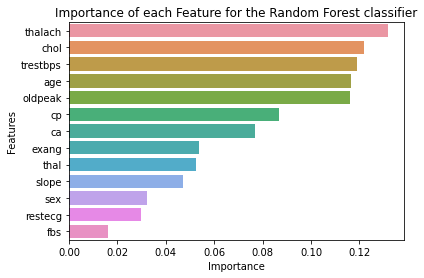

In [414]:
### cell för att kolla vilken data som är viktigast
import seaborn as sns
import matplotlib.pyplot as plt
clf_before_dropping = RandomForestClassifier(random_state=42).fit(x_train, y_train)


feature_scores = pd.Series(clf_before_dropping.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores


sns.barplot(x=feature_scores, y=feature_scores.index, )
plt.title("Importance of each Feature for the Random Forest classifier")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Vi kan se att fbs och restegc inte är särskilt viktiga 
### vi droppar dem :)

# x_train = x_train.drop(['fbs'], axis=1)
# x_test = x_test.drop(['fbs'], axis=1)

# x_train = x_train.drop(['restecg'], axis=1)
# x_test = x_test.drop(['restecg'], axis=1)



In [415]:
### cell för att normalisera datan! 
from sklearn import preprocessing
from sklearn.preprocessing import scale

X_train_scaled = scale(x_train_encoded)
X_test_scaled = scale(x_test_encoded)
#y_train = scale(y_train)

#x_train = preprocessing.normalize(x_train, norm='l2')
#x_test = preprocessing.normalize(x_test, norm='l1')
#y_train = preprocessing.normalize(x_train, norm='l2', axis=0)
#y_train = [x.mean() for x in y_train]

### inte manipulera med testdatan, AJABAJA det kan bli biased. 

#x_test = preprocessing.normalize(x_test, norm='l2')

#d = preprocessing.normalize(x_train, axis=0)
#x_train = pd.DataFrame(d, columns=column_names[:-1])
#x_train.head()

# manuell proprocessing
# for col in x_train.columns :
#     mean = x_train[col].mean()
#     x_train[col] = x_train[col] - mean 
#     x_test[col] = x_test[col] - mean
#     sigma = 1/(len(x_train[col])) * sum(x_train[col]**2)
#     x_train[col] = x_train[col] / sigma
#     x_test[col] = x_test[col] / sigma


# print(x_train)

In [416]:
clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train_scaled, y_train)

SVC(gamma='auto')

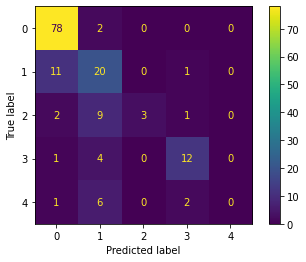

In [417]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_svm, X_train_scaled, y_train, values_format='d') #, display_labels=["did not defualt", "Defaulted"])

In [418]:
## CV with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C': [0.5, 1, 10, 100], # NOTE: Values for C must be > 0
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']}, 
]
## NOTE: We are including C=1 and gamma='scale'
## as possible choices since they are the default values

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [419]:
clf_svm = SVC(C=100, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001)

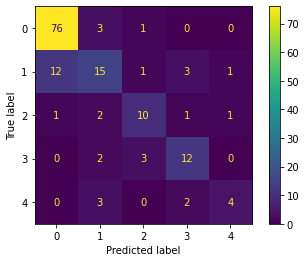

In [420]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_svm, X_train_scaled, y_train, values_format='d')

In [421]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#########################################################################
clf_svm = SVC(C=100, gamma=0.001)
cv_score_svc = cross_val_score(clf_svm, X_train_scaled, y_train)
print("mean CV score SVC: ", np.mean(cv_score_svc))
#########################################################################

mean CV score SVC:  0.5225806451612902


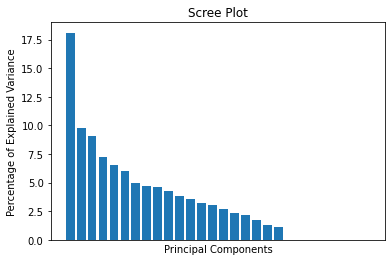

In [422]:
# START OF PCA AND SCREE PLOT

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [423]:
#
train_pc1_coords = X_train_pca[:, 0] # x-axis coordinates after PCA
train_pc2_coords = X_train_pca[:, 1] # y-axis coordinates after PCA

# Center and scale the PCs
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

param_grid = [
    {'C': [1, 10, 100, 1000], # NOTE: Values for C must be > 0
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']}, 
]
## NOTE: We are including C=1 and gamma='scale'
## as possible choices since they are the default values

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [424]:
#########################################################################
clf_svm = SVC(C=1000, gamma=0.0001)
cv_score_svc = cross_val_score(clf_svm, pca_train_scaled, y_train)
print("mean CV score SVC: ", np.mean(cv_score_svc))
#########################################################################

# import matplotlib.colors as colors

# clf_svm = SVC(C=1000, gamma=0.0001)
# clf_svm.fit(pca_train_scaled, y_train)

# # Transform the test dataset with the PCA
# X_test_pca = pca.transform(X_train_scaled)

# test_pc1_coords = X_test_pca[:, 0]
# test_pc2_coords = X_test_pca[:, 1]

# x_min = test_pc1_coords.min() - 1
# x_max = test_pc1_coords.max() + 1

# y_min = test_pc2_coords.min() - 1
# y_max = test_pc2_coords.min() + 1

# xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
#                      np.arange(start=y_min, stop=y_max, step=0.1))

# Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

# Z = Z.reshape(xx.shape)

# fig, ax = plt.subplots(figsize=(10,10))
# ax.contour(xx, yy, Z, alpha=0.1)
# cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])

# scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train,
#                      cmap=cmap,
#                      s=100,
#                      edgecolors='k',
#                      alpha=0.7)

# legend = ax.legend(scatter.legend_elements()[0],
#                    scatter.legend_elements()[1],
#                    loc = "upper right")

# legend.get_texts()[0].set_text("No Default")
# legend.get_texts()[1].set_text("Yes Default")

# ax.set_ylabel('PC2')
# ax.set_xlabel('PC1')
# ax.set_title('Decision sufaceusing the PCA trasformed/projected features')

# plt.show()

mean CV score SVC:  0.5694623655913978


In [425]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


y_pred_proba = clf.predict_proba(x_test)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test) 



y_predictions = []
for i in range(len(y_pred_proba)):
    
    y_predictions.append( [y_pred_proba[i][0], sum(y_pred_proba[i][1:])])
    #y_predictions.append(sum(y_pred_proba[i][1:]))
    
#print(y_predictions)
## om gissning är över 0.75 då är det en tillräckligt bra estimation. 

final_predictions = []
for pred in y_predictions:
    final_predictions.append((pred[1]))

print(final_predictions)
#print(len(final_predictions))

AttributeError: predict_proba is not available when  probability=False

In [ ]:
### CELL FÖR CROSS-VALIDATION 

random_forest = RandomForestClassifier(max_features=13, n_estimators=200,
                                       min_samples_leaf=50, n_jobs=-1)



In [ ]:
import csv

index = np.arange(0,150,1)

#print(index)

with open("nutestarvi.csv", 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(['id','expected'])
    for i in range(len(final_predictions)):
        
        wr.writerow([i, final_predictions[i]])
    
        
    
    
test1 = pd.read_csv("nutestarvi.csv", delimiter=",")
test1